# 2D DFT

In [2]:
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 

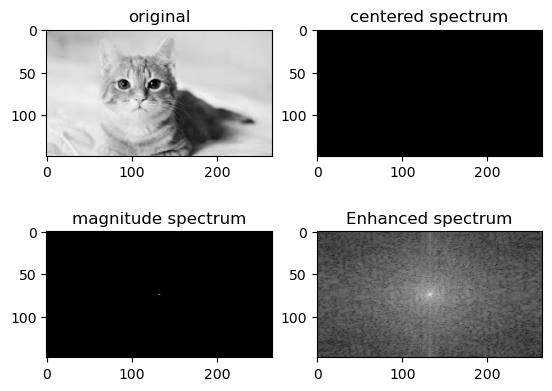

In [11]:
image=cv2.imread('cat.jpeg',0)
#compute 2d DFT
dft=np.fft.fft2(image)
# Shift the zero frequency component to the center
sdft=np.fft.fftshift(dft)
# Compute the magnitude spectrum
magnitude_spectrum=np.abs(sdft)
# Enhance spectrum by logarithmic transformation
enhance_spectrum=np.log(magnitude_spectrum+1)
plt.subplot(221)
plt.imshow(image,cmap='gray')
plt.title('original')
plt.subplot(222)
plt.imshow(np.abs(dft),cmap='gray')
plt.title('centered spectrum')
plt.subplot(223)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('magnitude spectrum')
plt.subplot(224)
plt.imshow(enhance_spectrum,cmap='gray')
plt.title('Enhanced spectrum')
cv2.waitKey(0)
cv2.destroyAllWindows() 

# Spatial filter

Text(0.5, 1.0, 'Difference')

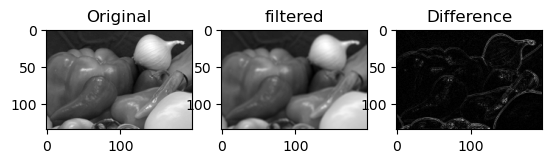

In [19]:
image=cv2.imread('onion.png',0) # take image in gray scale
kernel=np.ones((3,3),dtype=float)/9 # take a box filter
# Perform spatial filtering (convolution)
filtered=cv2.filter2D(image,-1,kernel)
diif=cv2.absdiff(image,filtered)
plt.subplot(131)
plt.title('Original')
plt.imshow(image,cmap='gray')
plt.subplot(132)
plt.imshow(filtered,cmap='gray')
plt.title('filtered')
plt.subplot(133)
plt.imshow(diif,cmap='gray')
plt.title('Difference') 

# Spatial Filtering without built in function

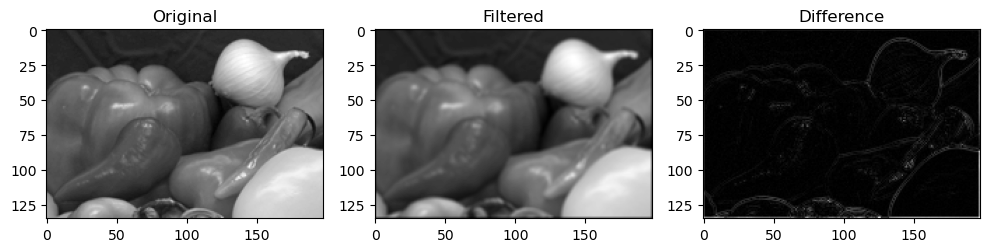

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolution(image, kernel):
    # Get the dimensions of the image and kernel
    rows_img, cols_img = image.shape
    rows_kernel, cols_kernel = kernel.shape
    
    # Compute the padding required
    pad_height = rows_kernel // 2
    pad_width = cols_kernel // 2
    
    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize the output image
    output = np.zeros_like(image)
    
    # Perform convolution
    for i in range(rows_img):
        for j in range(cols_img):
            output[i, j] = np.sum(padded_image[i:i+rows_kernel, j:j+cols_kernel] * kernel)
    
    return output

# Read the image in grayscale
image = cv2.imread('onion.png', 0)

# Define a box filter (kernel)
kernel = np.ones((3, 3), dtype=float) / 9

# Perform spatial filtering (convolution)
filtered = convolution(image, kernel)

# Calculate the difference between original and filtered images
diff = cv2.absdiff(image, filtered)

# Plot the images
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original')

plt.subplot(132)
plt.imshow(filtered, cmap='gray')
plt.title('Filtered')

plt.subplot(133)
plt.imshow(diff, cmap='gray')
plt.title('Difference')

plt.tight_layout()
plt.show()


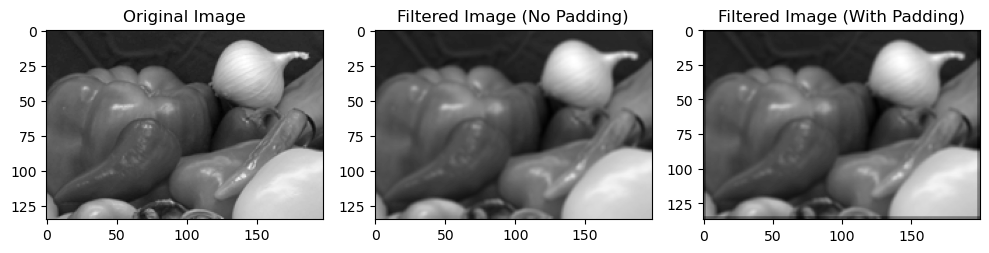

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, kernel, padding=False):
    if padding:
        # Add padding to the image
        padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')
        # Perform convolution with padding
        filtered_image = cv2.filter2D(padded_image, -1, kernel)
    else:
        # Perform convolution without padding
        filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# Read the image in grayscale
image = cv2.imread('onion.png', cv2.IMREAD_GRAYSCALE) 

# Define a simple averaging filter (3x3)
kernel = np.ones((3, 3), dtype=np.float32) / 9

# Apply filter without padding
filtered_image_no_padding = apply_filter(image, kernel, padding=False)

# Apply filter with padding
filtered_image_padding = apply_filter(image, kernel, padding=True)

# Plot the original, filtered (no padding), and filtered (with padding) images
plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(filtered_image_no_padding, cmap='gray')
plt.title('Filtered Image (No Padding)')

plt.subplot(133)
plt.imshow(filtered_image_padding, cmap='gray')
plt.title('Filtered Image (With Padding)')

plt.tight_layout()
plt.show()


In [25]:
filtered_image_padding.shape

(137, 200)

In [26]:
image.shape

(135, 198)

In [27]:
filtered_image_no_padding.shape 

(135, 198)

# spatail filter in a noisy Image

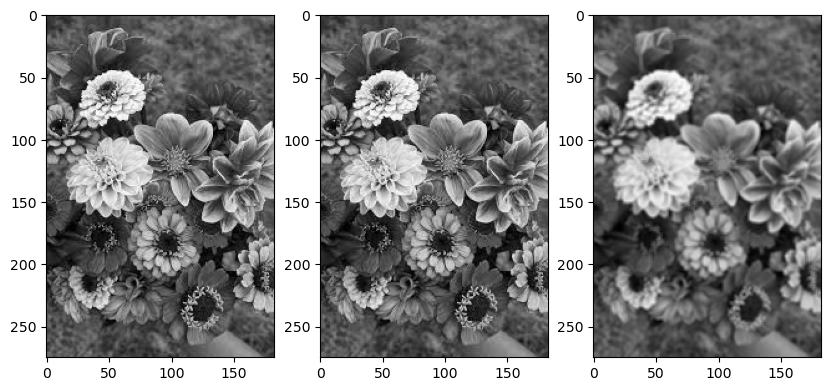

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image=cv2.imread('flower.jpeg',0)
noise=np.random.normal(0,0.1,image.shape)
noisy_image=image+noise
kernel=np.ones((3,3),dtype=float)/9
filtered_img=cv2.filter2D(noisy_image,-1,kernel)
plt.figure(figsize=(10,8))
plt.subplot(131)
plt.imshow(image,cmap='gray') 
plt.subplot(132)
plt.imshow(noisy_image,cmap='gray')
plt.subplot(133)
plt.imshow(filtered_img,cmap='gray')